In [2]:
import pandas as pd
import numpy as np
columns = ['label']
columns += ['pixel'+str(i) for i in range(1,50)]
data = pd.read_csv("NTruefinal.csv",names = columns, dtype = np.float32)
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,3.0,2.0,2.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0
3,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,...,1.0,0.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0
4,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,...,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0


In [3]:
from sklearn.model_selection import train_test_split
X = data.drop('label', axis=1)
y = data['label']
X, X_test, y, y_test = train_test_split(X, y, 
                                        test_size = 0.4, 
                                        random_state = 42,shuffle=True)
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X,y)
import time
tic = time.process_time()
rfc_predict = rfc.predict(X_test)
toc = time.process_time()
print(toc - tic)

#print("=== Confusion Matrix ===")
#print(confusion_matrix(y_test, rfc_predict))
#print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))



0.012081015999999778
Accuracy: 0.9971830985915493


In [8]:
import numpy as np
import csv
import math
def flat_list(l):
    flat_list = []
    for sublist in l:
        for item in sublist:
            flat_list.append(item)
    return flat_list

#def flat_list(l):
#    flat_list = []
#    for sublist in l:
#        for item in sublist:
#            flat_list.append(item)
#    return flat_list

A=np.loadtxt(open("iVAT1.csv", "rb"), delimiter=",")

R=A   #unnormalized
rows = A.shape[1]
cols = A.shape[0]
maxValue = np.amax(A)
minValue = np.amin(A)
fv=[]                 #model1 feature vector along diagonal
for x in range(cols):
    for y in range(rows):
        A[x,y]=math.ceil(((A[x,y]-minValue)/(maxValue-minValue))*255) # Normalization
    
    
B=np.pad(A, ((3,3),(3,3)), 'constant',constant_values=0) #Padding the normalized with 0's for model1
for j in range(3,len(A)+3):
    fv.append(flat_list(B[j-3:j+4,j-3:j+4]))

In [11]:
x = rfc.predict(fv)
L=[]  ### diagonal points detected as 1 from model1
for i in range(0,len(x)):
    if x[i]==1:
        L.append(i)
L.append(A.shape[0]-1)

In [12]:
L

[116, 389, 545, 584, 818, 896, 1013]

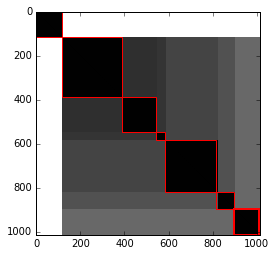

In [15]:
    import matplotlib.patches as patches
    import matplotlib.pyplot as plt
    from PIL import Image
    plt.figure()
    fig,ax = plt.subplots(1)
    
    #B = A.astype('float32')#*255.0/65536.0
    #B = B.astype('uint16')
    ax.imshow(R, cmap='gray')
    width,height = L[0],L[0]
    for z in range(0,len(L)-1):
        rect = patches.Rectangle((L[z],L[z]),-width,-height,linewidth=1,edgecolor='r',facecolor='none')
        #  plt.scatter([int(L[z])],[int(L[z])], color='red', s=1)
        width, height = L[z+1]-L[z],L[z+1]-L[z]
        ax.add_patch(rect)
    rect = patches.Rectangle((L[z],L[z]),width,height,linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    
    img = 'iVat_'+'1'+'.eps'
    plt.savefig(img)
    plt.show()

In [16]:
L

[116, 389, 545, 584, 818, 896, 1013]

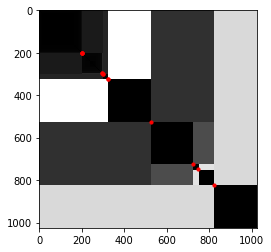

<Figure size 432x288 with 0 Axes>

In [11]:

#print(model.predict(x_test))
#print(y_test)
#x[0][0]
L=[]
for i in range(0,len(x)):
    if x[i]==1:
        L.append(i)
import matplotlib.pyplot as plt
plt.imshow(A, cmap='gray')
for z in range(0,len(L)):
    plt.scatter([int(L[z])],[int(L[z])], color='red', s=10)
    
plt.show()
plt.savefig('outputfinal.PNG')        

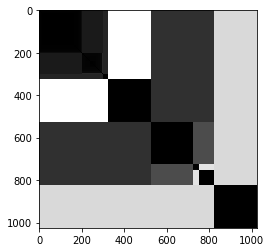

In [69]:
plt.imshow(A, cmap='gray')

In [70]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X, y)
tic = time.process_time()
knn_pred = knn.predict(X_test)
toc = time.process_time()
print(toc - tic)

#Predict the response for test dataset


from sklearn import metrics
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

0.05265131700000225
=== Confusion Matrix ===
[[365   1]
 [  1 353]]


Accuracy: 0.9902777777777778


In [71]:
any(y_test==1)

True

In [72]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Train Decision Tree Classifer
clf = clf.fit(X,y)

#Predict the response for test dataset
tic = time.process_time()
Des_pred = clf.predict(X_test)
toc = time.process_time()
print(toc - tic)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("Accuracy:",metrics.accuracy_score(y_test, Des_pred))


0.001645294000002906
=== Confusion Matrix ===
[[365   1]
 [  1 353]]


Accuracy: 0.9972222222222222


In [73]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics

classifier_linear = SVC(kernel='linear',gamma='auto', random_state = 1)
classifier_rbf = SVC(kernel='rbf',gamma='auto', random_state = 1)

classifier_rbf.fit(X,y)
classifier_linear.fit(X,y)
tic = time.process_time()
Y_pred_rbf = classifier_rbf.predict(X_test)
Y_linear = classifier_linear.predict(X_test)
toc = time.process_time()
print(toc - tic)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("Accuracy_rbf:",metrics.accuracy_score(y_test, Y_pred_rbf))
print("Accuracy_linear:",metrics.accuracy_score(y_test, Y_linear))


0.05451798100000005
=== Confusion Matrix ===
[[365   1]
 [  1 353]]


Accuracy_rbf: 0.5083333333333333
Accuracy_linear: 1.0


In [74]:
a=[[1,2,3],[4,5,6]]

In [16]:
a[:][0:1]

[[1, 2, 3]]